## Air Passenger

In [1]:
#import necessary libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [2]:
dataset = pd.read_csv('airline passengers.csv')
dataset.head()

,Month,Passengers
0,1949-01,112
1,1949-02,118
2,1949-03,132
3,1949-04,129
4,1949-05,121


In [3]:
series = pd.read_csv('airline passengers.csv', header = 0, index_col = 0, squeeze = True, parse_dates = True)
series

Month
1949-01-01    112
1949-02-01    118
1949-03-01    132
1949-04-01    129
1949-05-01    121
             ... 
1960-08-01    606
1960-09-01    508
1960-10-01    461
1960-11-01    390
1960-12-01    432
Name: Passengers, Length: 144, dtype: int64

In [4]:
# checking the nuber of observations

print(series.size)

144


In [5]:
# descriptive statistics

print(series.describe())

count    144.000000
mean     280.298611
std      119.966317
min      104.000000
25%      180.000000
50%      265.500000
75%      360.500000
max      622.000000
Name: Passengers, dtype: float64


## Feature Engineering

In [6]:
# creating date time feature of the series

dataframe = pd.DataFrame()

dataframe['Year'] = [series.index[i].year for i in range(len(series))]
dataframe['Month'] = [series.index[i].month for i in range(len(series))]
dataframe['Day'] = [series.index[i].day for i in range(len(series))]
dataframe['Passengers'] = [series[i] for i in range(len(series))]
dataframe.head()

,Year,Month,Day,Passengers
0,1949,1,1,112
1,1949,2,1,118
2,1949,3,1,132
3,1949,4,1,129
4,1949,5,1,121


In [7]:
# creating a lag feature for daily temperature dataset

passengers = pd.DataFrame(series.values)
dataframe = pd.concat([passengers.shift(1), passengers], axis=1)
dataframe.columns = ['p', 'p+1']
print(dataframe.head(5))

       p  p+1
0    NaN  112
1  112.0  118
2  118.0  132
3  132.0  129
4  129.0  121


In [8]:
# creating lag features (using the last three values)

passengers = pd.DataFrame(series.values)
dataframe = pd.concat([passengers.shift(3), passengers.shift(2), passengers.shift(1), passengers], axis = 1)

dataframe.columns = ['p-2', 'p-1', 'p', 'p+1']
print(dataframe.head(5))

     p-2    p-1      p  p+1
0    NaN    NaN    NaN  112
1    NaN    NaN  112.0  118
2    NaN  112.0  118.0  132
3  112.0  118.0  132.0  129
4  118.0  132.0  129.0  121


In [9]:
# creating a rolling mean feature

passengers = pd.DataFrame(series.values)
shifted = passengers.shift(1)
window = shifted.rolling(window=2)
means = window.mean()

dataframe = pd.concat([means, passengers], axis = 1)
dataframe.columns = ['mean(p-1,p)', 'p+1']
print(dataframe.head(5))

   mean(p-1,p)  p+1
0          NaN  112
1          NaN  118
2        115.0  132
3        125.0  129
4        130.5  121


In [10]:
# creating roling statistic features: expanding with statistics adding the min, mean, max

passengers = pd.DataFrame(series.values)
width = 3
shifted = passengers.shift(width - 1)
window = shifted.rolling(window = width)
dataframe = pd.concat([window.min(), window.mean(), window.max(), passengers], axis = 1)
dataframe.columns = ['min', 'mean', 'max', 'p+1']
print(dataframe.head(8))

     min        mean    max  p+1
0    NaN         NaN    NaN  112
1    NaN         NaN    NaN  118
2    NaN         NaN    NaN  132
3    NaN         NaN    NaN  129
4  112.0  120.666667  132.0  121
5  118.0  126.333333  132.0  135
6  121.0  127.333333  132.0  148
7  121.0  128.333333  135.0  148


In [11]:
# creating expanding window features with statistics adding the min, mean, max

passengers = pd.DataFrame(series.values)
window = passengers.expanding()
dataframe = pd.concat([window.min(), window.mean(), window.max(), passengers.shift(-1)], axis = 1)
dataframe.columns = ['min', 'mean', 'max', 'p+1']
dataframe.head()

,min,mean,max,p+1
0,112.0,112.000000,112.0,118.0
1,112.0,115.000000,118.0,132.0
2,112.0,120.666667,132.0,129.0
3,112.0,122.750000,132.0,121.0
4,112.0,122.400000,132.0,135.0


## Visualizing The Series

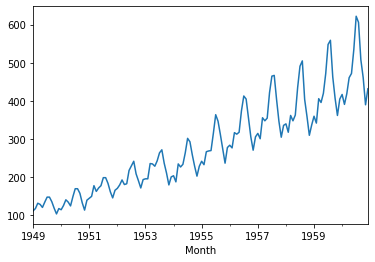

In [12]:
# creating aline plot for the series

series.plot()
plt.show()

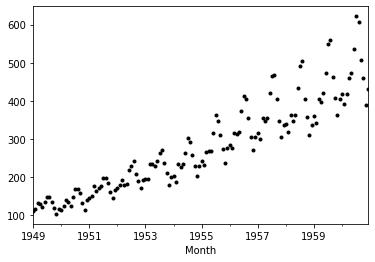

In [13]:
# creating a dot plot for the series

series.plot(style='k.')
plt.show()

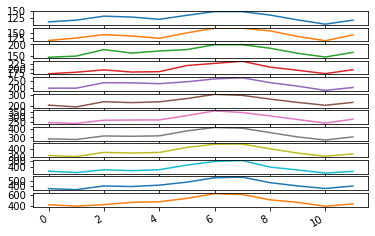

In [14]:
# creating a stacked line plots

groups = series.groupby(pd.Grouper(freq = 'A'))
years = pd.DataFrame()
for name, group in groups:
    years[name.year] = group.values
    
years.plot(subplots = True, legend = False)
plt.show()

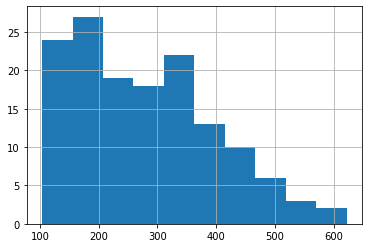

In [15]:
# creating an histogram plot

series.hist()
plt.show()

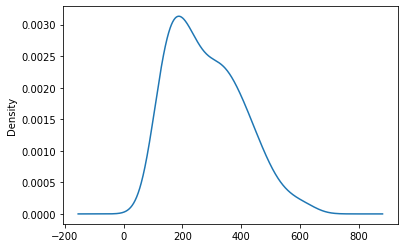

In [16]:
# creating a density plot

series.plot(kind = 'kde')
plt.show()

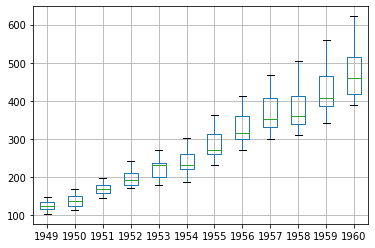

In [17]:
# creating a boxplot of yearly data

group = series.groupby(pd.Grouper(freq = 'A'))
years = pd.DataFrame()
for name, group in groups:
    years[name.year] = group.values
    
years.boxplot()
plt.show()

In [ ]:
# creating a heat map of yearly data

In [ ]:
# creating a heatmap of daily data

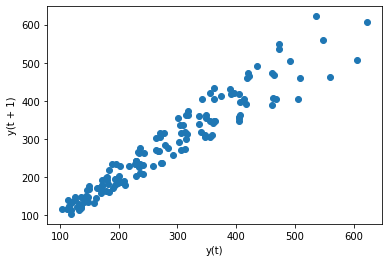

In [22]:
# creating a lag scatter plot

pd.plotting.lag_plot(series)
plt.show()

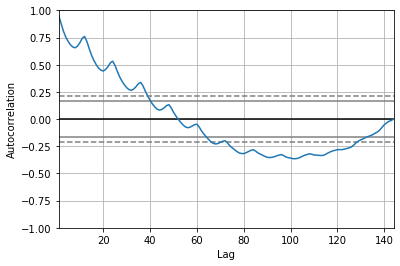

In [24]:
# creating the aurocerellation plot

pd.plotting.autocorrelation_plot(series)
plt.show()

## performing power transformations

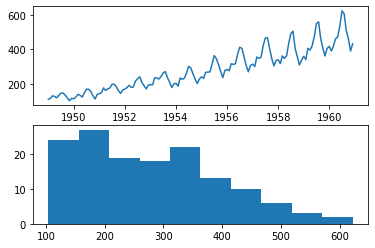

In [19]:
# visualizing the series

plt.figure(1)
plt.subplot(211)
plt.plot(series)
plt.subplot(212)
plt.hist(series)
plt.show()

In [20]:
# square root transformations

n_series = [i]


NameError: name 'i' is not defined